In [6]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris 
iris=load_iris() 
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) 
df['target'] = iris.target

## 1. Use the DecisionTree Classifier from sklearn library on a dataset of your choice to demonstrate its working. Use a dataset to allow for both gini index based approach and entropy based approach and visualize the resulting decision trees. 

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis=1), df['target'], test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
ent_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
gini_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
ent_tree.fit(X_train,y_train)
gini_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [14]:
y_pred_entropy = ent_tree.predict(X_test)
y_pred_gini = gini_tree.predict(X_test)

[Text(0.3181818181818182, 0.9, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.22727272727272727, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.18181818181818182, 0.5, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.09090909090909091, 0.3, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.2727272727272727, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.45454545454545453, 0.3, 'x[2] <= 4.95\nentropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.36363636363636365, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5454545454545454, 0.1, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8181818181818182, 0.3, 'x[2] <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 

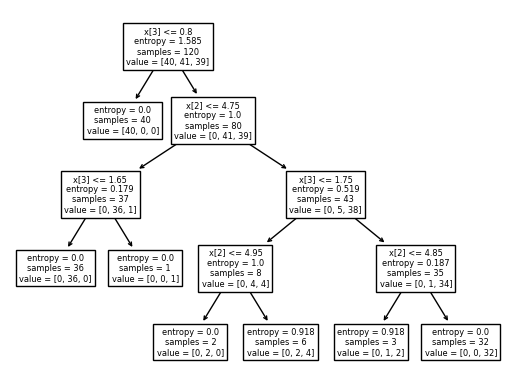

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(ent_tree)

[Text(0.3181818181818182, 0.9, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.22727272727272727, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4090909090909091, 0.7, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.18181818181818182, 0.5, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.45454545454545453, 0.3, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.36363636363636365, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5454545454545454, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8181818181818182, 0.3, 'x[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7272727272727273, 

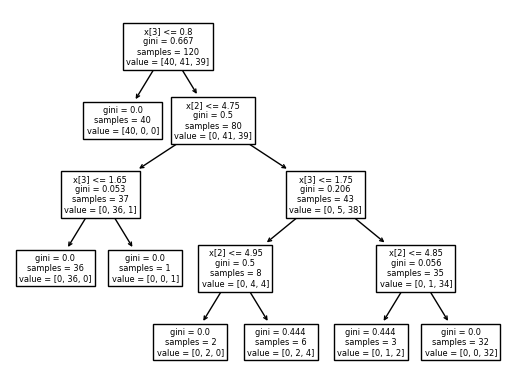

In [18]:
tree.plot_tree(gini_tree)

## 2. Create a decision tree without using sklearn library, just using the concept of entropy and choose what node will be the root, and subsequent decision parameters based on information gain. Show all calculations.

In [28]:
# Sample dataset (subset of Iris dataset)
data = {
    'petal_length': [1.4, 1.4, 4.7, 4.5, 5.0, 5.1],
    'petal_width': [0.2, 0.2, 1.4, 1.5, 1.7, 1.8],
    'class': ['Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica']
}

df = pd.DataFrame(data)

def entropy(classes):
    _, counts = np.unique(classes, return_counts=True)
    probabilities = counts / len(classes)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(df, split_feature, target_feature):
    total_entropy = entropy(df[target_feature])
    
    values, counts = np.unique(df[split_feature], return_counts=True)
    
    weighted_entropy = 0
    for value, count in zip(values, counts):
        subset = df[df[split_feature] == value]
        subset_entropy = entropy(subset[target_feature])
        weighted_entropy += (count / len(df)) * subset_entropy
    
    return total_entropy - weighted_entropy

def best_split(df, target_feature):
    features = df.columns.drop(target_feature)
    info_gains = {feature: information_gain(df, feature, target_feature) for feature in features}
    
    return max(info_gains, key=info_gains.get), info_gains

def build_tree(df, target_feature, depth=0):
    if len(np.unique(df[target_feature])) == 1:
        return np.unique(df[target_feature])[0]
    
    if len(df) == 0 or depth == 0:
        return np.unique(df[target_feature])[np.argmax(np.unique(df[target_feature], return_counts=True)[1])]
    
    best_feature, gains = best_split(df, target_feature)
    
    tree = {best_feature: {}}
    
    for value in np.unique(df[best_feature]):
        subset = df[df[best_feature] == value]
        tree[best_feature][value] = build_tree(subset, target_feature, depth - 1)
    
    return tree

decision_tree = build_tree(df, target_feature='class', depth=2)

import pprint
pprint.pprint(decision_tree)


{'petal_length': {1.4: 'Setosa',
                  4.5: 'Versicolor',
                  4.7: 'Versicolor',
                  5.0: 'Virginica',
                  5.1: 'Virginica'}}


## 3. Show how decision trees can be used for both classification and regression using a program with sample dataset. Also visualize the decision tree obtained

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.datasets import make_blobs, make_regression 
from sklearn.model_selection import train_test_split 
from sklearn.tree import export_graphviz 

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, 
random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.2, random_state=42) 
 
clf = DecisionTreeClassifier(max_depth=3, random_state=42) 
clf.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3, random_state=42)

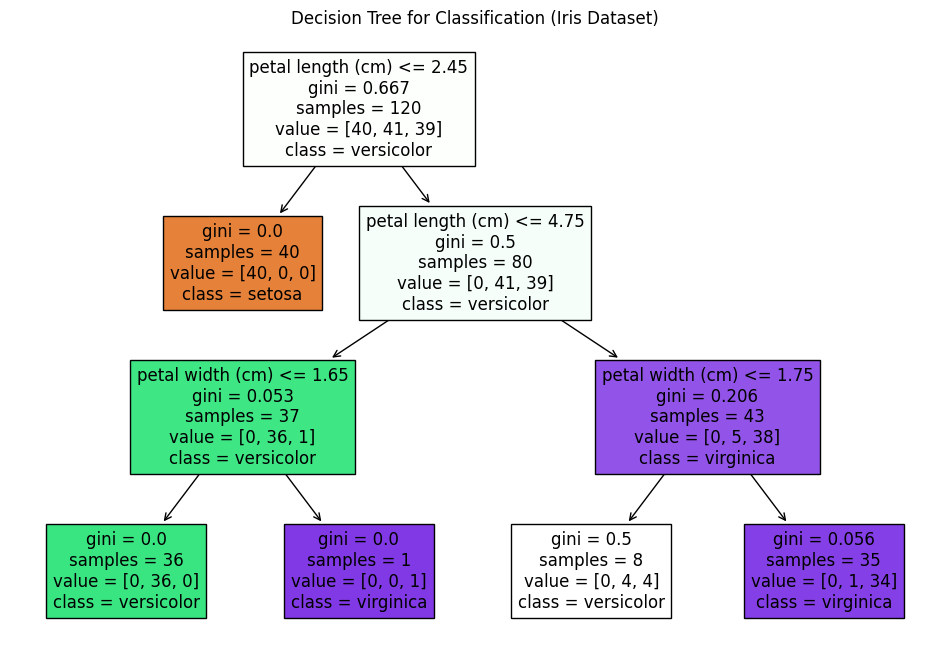

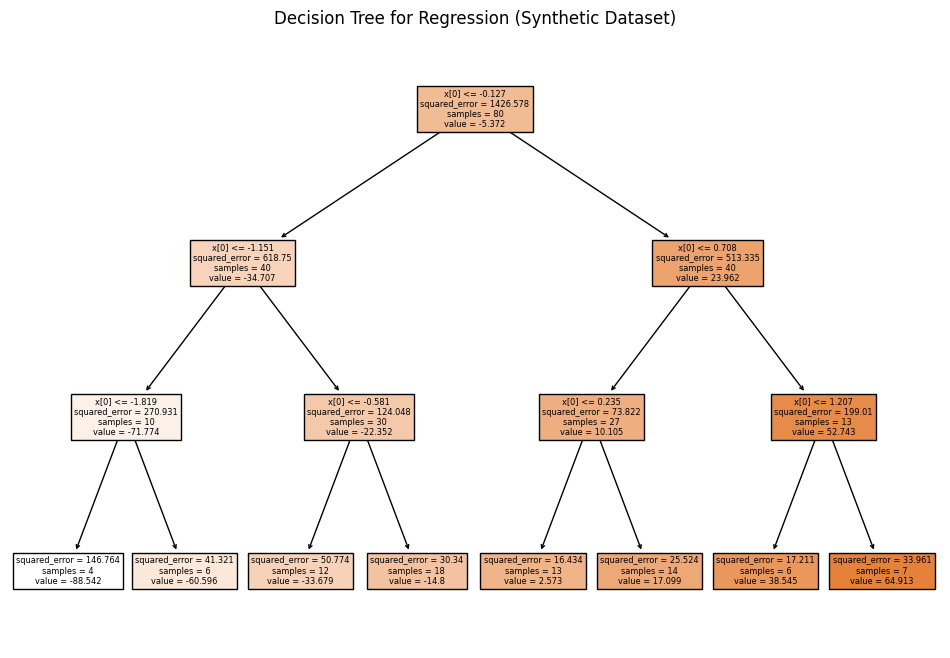

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

iris = load_iris()
X_clf, y_clf = iris.data, iris.target


X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_clf_train, y_clf_train)

# Load a synthetic dataset for regression
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split the regression data into training and test sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create and train a decision tree regressor
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_reg_train, y_reg_train)

# Visualization of the Decision Tree for Classification
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Classification (Iris Dataset)")
plt.show()

# Visualization of the Decision Tree for Regression
plt.figure(figsize=(12, 8))
plot_tree(reg, filled=True)
plt.title("Decision Tree for Regression (Synthetic Dataset)")
plt.show()
